# Cramer's V Test 

- Used to find out the strength between 2 categorical values.
- Similar to Pearson correlation coeffecient which is used to identify the relation between 2 continous variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('churn_data_st.csv')
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [3]:
churn_df = df.copy()
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [4]:
churn_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [7]:
# WILL SHOW THE CORRELATION BETWEEN THE NUMERICAL VARIABLES 
churn_df.corr()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795
tenure,0.016567,1.000000,0.508526,0.247900,0.826066
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000


In [8]:
churn_df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

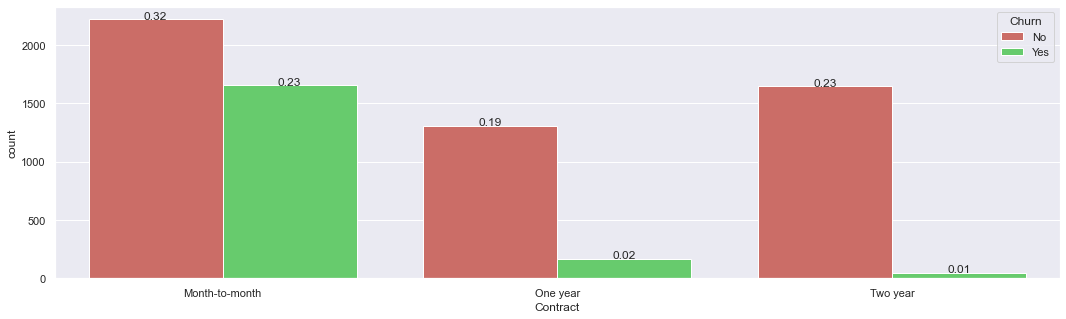

In [9]:
sns.set(style ="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.countplot(x="Contract", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}'.format(height/churn_df.shape[0]),ha="center")

    Chi-SQ Statistics :
    X^2 = sum((Observed-Expected)^2/Expected)
    
    --------------------------------------------------------------
    
    Cramer's V-Test
    V = Sqrt(chi2/(n*(min(C,R)-1)))
    
    C = Column count
    R = Row count

**NOTE : The problem with the Chi-Sq test is that it will just show you the relation and not the strength of the 2 categorical variables**

It is similar to like covariance and correlation difference

### Contingency table

In [15]:
contract_churn_ct = pd.crosstab(index=churn_df['Contract'], columns=churn_df['Churn'])
contract_churn_ct

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [20]:
contract_churn_ct.iloc[2].values

array([1647,   48], dtype=int64)

In [18]:
from scipy import stats
(chi2, pvalue, dof, _) = stats.chi2_contingency([contract_churn_ct.iloc[0].values, contract_churn_ct.iloc[1].values, contract_churn_ct.iloc[2].values])

print('chi2 : ', chi2)
print('p-value : ', pvalue)
print('dof : ', dof)
print(_)

chi2 :  1184.5965720837926
p-value :  5.863038300673391e-258
dof :  2
[[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]


     Here the chi sq value is more so the more the chi2 value is the more chances that the variable column is significant
     p-value is near to 0 ; which is mainly less than the 0.05 so there is a high chance of getting significant relation
     between the 2 categorical values.

## Cramers V Test

    V = Sqrt(chi2/(n*(min(C,R)-1)))

    C = Column count
    R = Row count
    n = no. of rows we have in the whole dataset .. df.shape[0]
    
    V value is more closer to 1 then the relationship is very strong...But in real use cases if you have 4-5 Categorical values
    just dont go by the more closer to 1 formula... there you need to choose the top highest among all the 4-5 Categorical
    values
    
    

In [22]:
np.sqrt(chi2/churn_df.shape[0]) # here the min(C,R) is just 2 so 2-1 ==1

0.4101156965761409

## Now lets do the cramer's V Test for the another categorical variable ... "paperless billing"

In [23]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

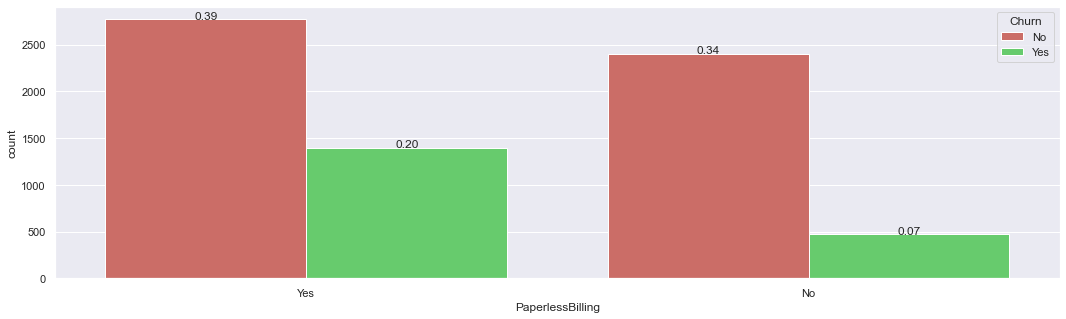

In [26]:
sns.set(style ="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}'.format(height/churn_df.shape[0]),ha="center")

### Contingency table 

In [27]:
paper_churn_ct = pd.crosstab(index=churn_df['PaperlessBilling'], columns=churn_df['Churn'])
paper_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [30]:
paper_churn_ct.iloc[1].values

array([2771, 1400], dtype=int64)

In [32]:
from scipy import stats
(chi2, pvalue, dof, _) = stats.chi2_contingency([paper_churn_ct.iloc[0].values, paper_churn_ct.iloc[1].values])

print('chi2 : ', chi2)
print('p-value : ', pvalue)
print('dof : ', dof)
print(_)

chi2 :  258.27764906707307
p-value :  4.073354668665985e-58
dof :  1
[[2109.85773108  762.14226892]
 [3064.14226892 1106.85773108]]


## Cramer's V-Test

In [33]:
np.sqrt(chi2/churn_df.shape[0]) # here the min(C,R) is just 2 so 2-1 ==1

0.19149814355338285

    OBSERVATION : So this Cramers value is less than the previous variable that we tested ... of the "Contract" column ... 

### Now lets do the Cramers V test for the Gender variable also


In [34]:
churn_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

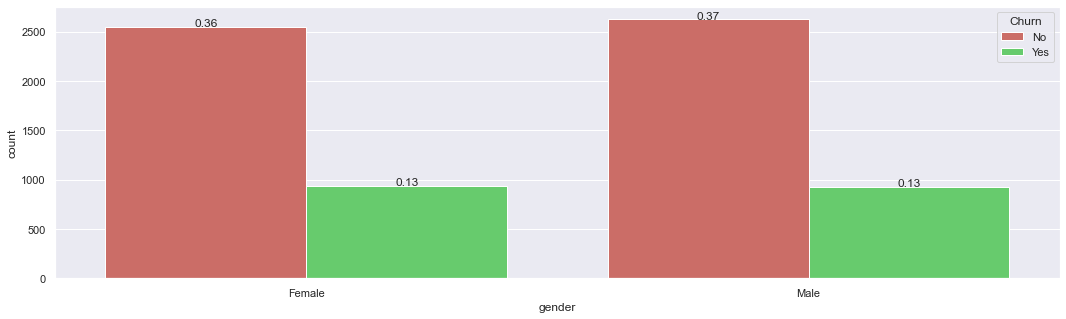

In [35]:
sns.set(style ="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.countplot(x="gender", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}'.format(height/churn_df.shape[0]),ha="center")

### Contingency table

In [39]:
gender_churn_ct = pd.crosstab(index=churn_df['gender'], columns=churn_df['Churn'])
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [40]:
from scipy import stats
(chi2, pvalue, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

print('chi2 : ', chi2)
print('p-value : ', pvalue)
print('dof : ', dof)
print(_)

chi2 :  0.4840828822091383
p-value :  0.48657873605618596
dof :  1
[[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]


**NOTE : if the p value is lesser than the 0.05 then that means that variable is having high significant value**

In [41]:
np.sqrt(chi2/churn_df.shape[0])

0.008290505631771371

    OBSERVATION :The Cramers value is very very low so it shows that this gender column is not having much relationship 
    between the churn variable that is the output value.
    